# Arabic Poetry Category Classification 


## imports

In [16]:
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

##############################################
##############Data Preprocessing##############
##############################################

#Data Cleaning
import argparse
from nltk.stem.isri import ISRIStemmer
import sys

#Tokenization


##############################################
##############  MODEL TRAINING  ##############
##############################################


## Preprocessing

### Importing the data

In [2]:
df = pd.read_csv('all_poems.csv')
df.poem_text=df.poem_text.astype(str)

### Cleaning 

In [3]:
df.drop(["poem_style"], axis=1, inplace=True)
df.drop(["poem_link"], axis=1, inplace=True)
df.drop(["poet_link"], axis=1, inplace=True)
df.drop(["poet_id"], axis=1, inplace=True)
df.drop(["poet_name"], axis=1, inplace=True)
df.drop(["poem_title"], axis=1, inplace=True)
df.drop(["poem_id"], axis=1, inplace=True)

In [4]:
df.columns

Index(['poem_text', 'poet_cat'], dtype='object')

### Downsampling data 

In [5]:
df.drop((df[df["poet_cat"]=="العصر العباسي"]).index[:13000], inplace=True)
df.drop((df[df["poet_cat"]=="العراق"]).index[:2000], inplace=True)
df.drop((df[df["poet_cat"]=="سوريا"]).index[:3000], inplace=True)
df.drop((df[df["poet_cat"]=="لبنان"]).index[:2000], inplace=True)

In [6]:
df["poet_cat"].value_counts() 

العصر العباسي          6417
العصر الأندلسي         6296
مصر                    4793
العصر الإسلامي         3700
لبنان                  2800
العراق                 2252
سوريا                  2036
السعودية               1931
فلسطين                 1713
العصر الجاهلي          1461
اليمن                   700
عمان                    619
الإمارات                563
البحرين                 555
الجزائر                 405
السودان                 403
تونس                    351
الأردن                  265
ليبيا                   240
المغرب                  202
إيران                    90
أفغانستان                70
شعراء العراق والشام      68
الكويت                   54
قطر                      22
موريتانيا                15
Name: poet_cat, dtype: int64

### Grouping categories

In [7]:
def combine(x):
    if (( x == "العراق") or (x == "السعودية") or (x == "الإمارات") or (x == "البحرين") or (x == "الكويت") or (x == "قطر") or (x == "عمان") or  (x == "اليمن") ) :
        return "Arabian Peninsula"
    elif ( x == "فلسطين" or x == "سوريا" or x == "لبنان" or x == "الأردن") :
        return "Bilad al-Sham"
    elif ( x == "الجزائر" or x=="السودان" or x=="تونس" or x=="ليبيا" or x=="المغرب" or x=="مصر"):
        return "North African Countries"
    elif (x=="العصر الأندلسي"):
        return "Andalusia"
    elif (x == "العصر العباسي"):
        return "Abbasid Empire"
    else:
        return "Other"

df["category"] = df['poet_cat'].apply(combine) # create new column with specific values to conditions

In [8]:
df.drop(df[df["category"]=="Other"].index, axis=0, inplace=True) # Drop all other categories

## Visualizing data

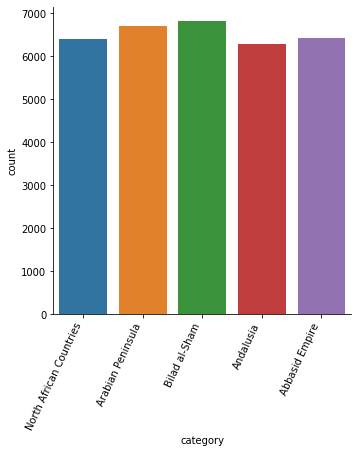

In [9]:
chart = sns.catplot(
    data=df,
    kind='count',
    x='category')
chart.set_xticklabels(rotation=65, horizontalalignment='right')



# Preparing Data for Training

In [10]:
df.head()

,poem_text,poet_cat,category
798,ايتها العرافة المقدسة جءت اليك مثخنا بالطعنات ...,مصر,North African Countries
799,"في غرف العمليات, كان نقاب الاطباء ابيض, لون ال...",مصر,North African Countries
800,"وسلال من الورد, المحها بين اغفاءة وافاقه وعلي ...",مصر,North African Countries
801,صورة هل انا كنت طفلا ام ان الذي كان طفلا سواي ...,مصر,North African Countries
802,"(1) الطيور مشردة في السموات, ليس لها ان تحط عل...",مصر,North African Countries


## Numpt Array Preperation

In [15]:
#Creating new dataframe for training 
new_data = df.drop(["poet_cat"], axis=1)
new_data = new_data.drop(["category"], axis=1)
dflabel = df[['category']]
new_data.insert(len(new_data.columns),"category",dflabel)

#########################################################################
############################  NUMPY ARRAYS  #############################
#########################################################################

# convert the array into a numpy array
arr = new_data.to_numpy()
# separate X and Y
Y = arr[:,1]
Y=Y.astype(str)
X = arr[:,0]
X=X.astype(str)
print(X)
print(Y)

['ايتها العرافة المقدسة جءت اليك مثخنا بالطعنات والدماء ازحف في معاطف القتلي وفوق الجث المكدسة منكسر السيف مغبر الجبين والاعضاء اسال يا زرقاء عن فمك الياقوت عن نبوءة العذراء عن ساعدي المقطوع وهو ما يزال مسكا بالراية المنكسة عن صور الاطفال في الخوذات ملقاة علي الصحراء عن جاري الذي يهم بارتشاف الماء فيثقب الرصاص راسه في لحظة الملامسة عن الفم المحشو بالرمال والدماء اسال يا زرقاء عن وقفتي العزلاء بين السيف والجدار عن صرخة المراة بين السبي والفرار كيف حملت العار ثم مشيت دون ان اقتل نفسي دون ان انهار ودون ان يسقط لحمي من غبار التربة المدنسة تكلمي ايتها النبية المقدسة تكلمي باله بالعنة بالشيطان لا تغمضي عينيك فالجرذان تلعق من دمي حساءها ولا اردها تكلمي لشد ما انا مهان لا اليل يخفي عورتي كلا ولا الجدران ولا اختباءي في الصحيفة التي اشدها ولا احتماءي في سحاءب الدخان تقفز حولي طفلة واسعة العينين عذبة المشاكسة ( - كان يقص عنك يا صغيرتي ونحن في الخنادق فنفتح الازرار في ستراتنا ونسند البنادق وحين مات عطشا في الصحراء المشمسة رطب باسمك الشفاه اليابسة وارتخت العينان ) فاين اخفي وجهي المتهم المدان والضح

## Cleaning Data 

In [29]:
# Arabic light stemming for Arabic text
# takes a word list and perform light stemming for each Arabic words
def light_stem(text):
    words = text.split()
    result = list()
    stemmer = ISRIStemmer()
    for word in words:
        word = stemmer.norm(word, num=1)      # remove diacritics which representing Arabic short vowels
        if not word in stemmer.stop_words:    # exclude stop words from being processed
            word = stemmer.pre32(word)        # remove length three and length two prefixes in this order
            word = stemmer.suf32(word)        # remove length three and length two suffixes in this order
            word = stemmer.waw(word)          # remove connective ‘و’ if it precedes a word beginning with ‘و’
            word = stemmer.norm(word, num=2)  # normalize initial hamza to bare alif
#             word=stemmer.pro_w4(word)         #process length four patterns and extract length three roots
#             word=stemmer.pro_w53(word)        #process length five patterns and extract length three roots
#             word=stemmer.pro_w54(word)        #process length five patterns and extract length four roots
#             word=stemmer.end_w5(word)         #ending step (word of length five)
#             word=stemmer.pro_w6(word)         #process length six patterns and extract length three roots
#             word=stemmer.pro_w64(word)        #process length six patterns and extract length four roots
#             word=stemmer.end_w6(word)         #ending step (word of length six)
#             word=stemmer.suf1(word)           #normalize short sufix
#             word=stemmer.pre1(word)           #normalize short prefix
            
        result.append(word)
    return ' '.join(result)

cleaned_X=[]
for i in range (1):
    cleaned_X.append(light_stem(X[i]))
    print(cleaned_X)
    print("Nromal")
    print(X[i])

['ايت عرافة مقدسة جءت اليك مثخ طعن دماء ازحف في معاطف قتلي وفوق الجث مكدسة منكسر سيف مغبر جبين اعضاء اسال يا زرقاء عن فمك ياقوت عن نبوءة عذراء عن ساعدي مقطوع وهو ما يزال مسكا راية منكسة عن صور اطفال في خوذ ملقاة علي صحراء عن جاري الذي يهم بارتشاف ماء فيثقب رصاص راسه في لحظة ملامسة عن الفم محشو رمال دماء اسال يا زرقاء عن وقفتي عزلاء بين سيف جدار عن صرخة مراة بين سبي فرار كيف حملت عار ثم مشيت دون ان اقتل نفسي دون ان انهار ودون ان يسقط لحمي من غبار تربة مدنسة تكلمي ايت نبية مقدسة تكلمي باله عنة شيط لا تغمضي عينيك فالجرذ تلعق من دمي حساء ولا ارد تكلمي لشد ما انا مهان لا اليل يخفي عورتي كلا ولا جدر ولا اختباءي في صحيفة التي اشد ولا احتماءي في سحاءب دخان تقفز حولي طفلة واسعة عين عذبة مشاكسة ( - كان يقص عنك يا صغيرتي ونحن في خنادق فنفتح ازرار في سترات ونسند بنادق وحين مات عطشا في صحراء مشمسة رطب باسمك شفاه يابسة وارتخت عين ) فاين اخفي وجهي متهم مدان ضحكة طروب ضحكته وجه غماز * * * ايت نبية مقدسة لا تسكتي فقد سكت سنة فسنة لكي انال فضلة امان قيل لي "اخرس " فخرست وعميت واءتمت خصي ظلت في عبيد ( عب